## ANSHU YADAV
Data Science and Business Analytics Intern @ The Sparks Foundation

Topic : Exploratory Data Analysis (EDA) - Global Terrorism

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing the Dataset

In [2]:
df = pd.read_csv('globalterrorism.csv',encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

#Preprocessing the Dataset

In [4]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
print(df.columns)

Index(['eventid', 'Year', 'Month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [6]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [7]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
df.shape

(181691, 18)

In [9]:
#checking for missing values
df.isnull().sum()

,0
Year,0
Month,0
day,0
Country,0
State,421
Region,0
City,435
latitude,4556
longitude,4557
Attacktype,0


In [10]:
# Handling missing data
df['kill'] = df['kill'].fillna(0)
df['Wound'] = df['Wound'].fillna(0)
df['Casualities'] = df['kill'] + df['Wound']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181053 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [12]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


## Performing Exploratory Data Analysis

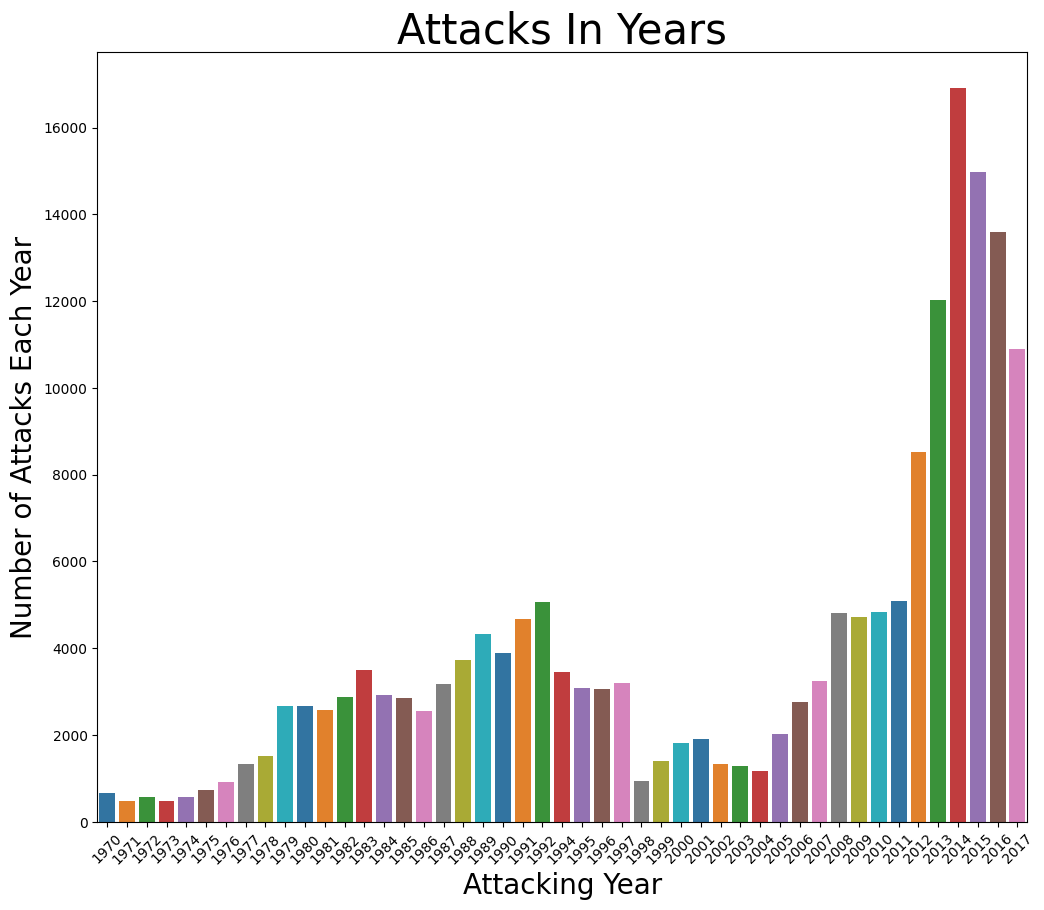

In [13]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,10))
sns.barplot(x = year,
            y  = years_count,
            palette="tab10")
plt.title('Attacks In Years',fontsize=30)
plt.xticks(rotation = 45)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.show()

2014 has the highest number of attacks followed by 2015, 2016, 2013 and then 2017.

## Visualizing Terrorist Activities By Region In Each Year.

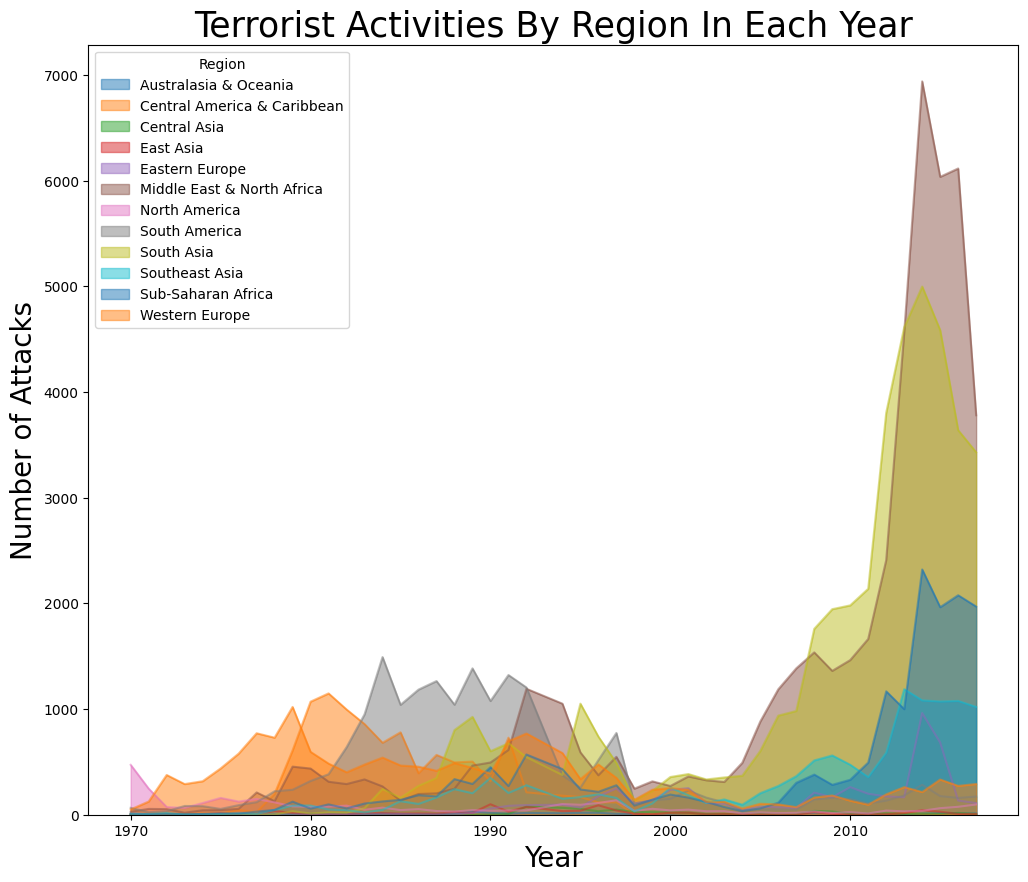

In [14]:
pd.crosstab(df.Year, df.Region).plot(kind = 'area',stacked = False, figsize = (12, 10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.show()

Middle East & North Africa are the most attacked region followed by South Asia.

##Visualizing the Top Countries Affected by Terrorism.

In [15]:
attack = df.Country.value_counts()[:10]
attack

,count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


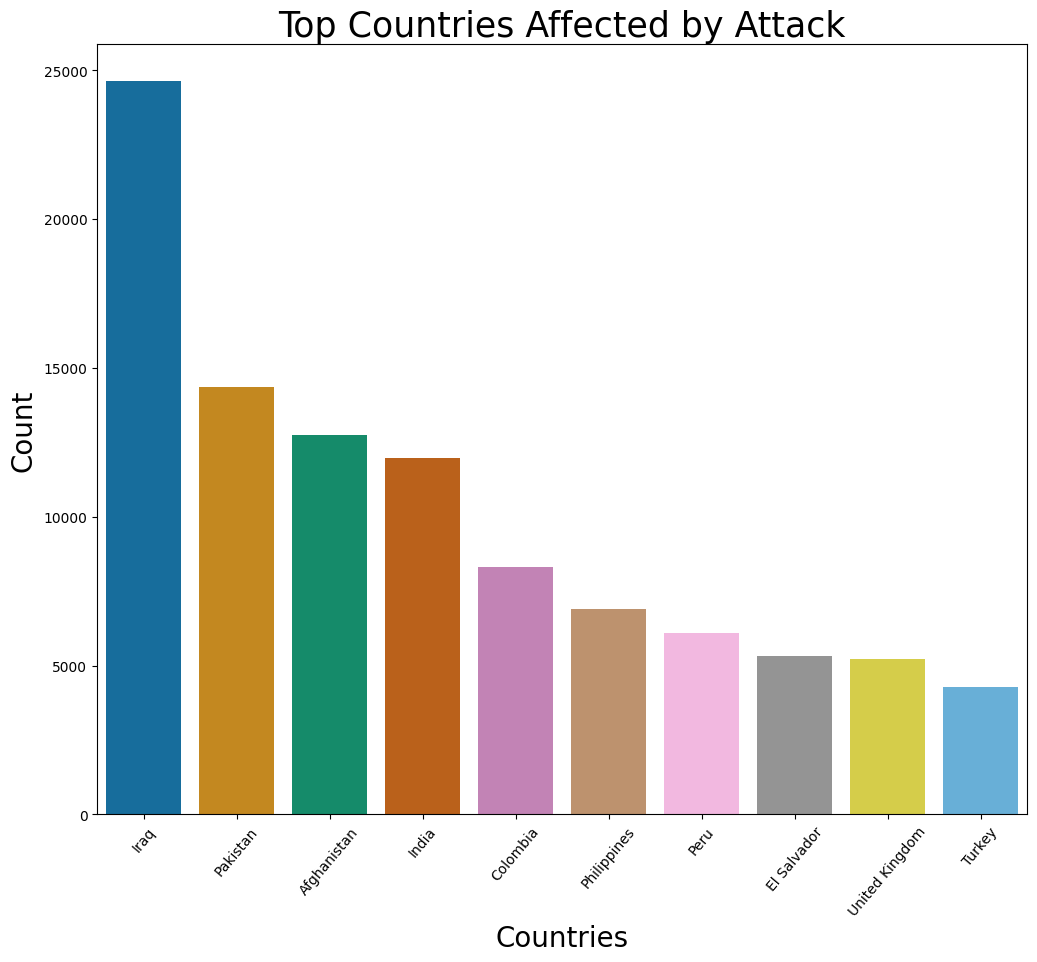

In [16]:
plt.subplots(figsize = (12, 10))
sns.barplot(x =df['Country'].value_counts()[:10].index,y =df['Country'].value_counts()[:10].values,palette = 'colorblind')
plt.title('Top Countries Affected by Attack',fontsize = 25)
plt.xlabel('Countries',fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

Iraq is the top attacked Country.

## Visualizing Number of people died due to attacks

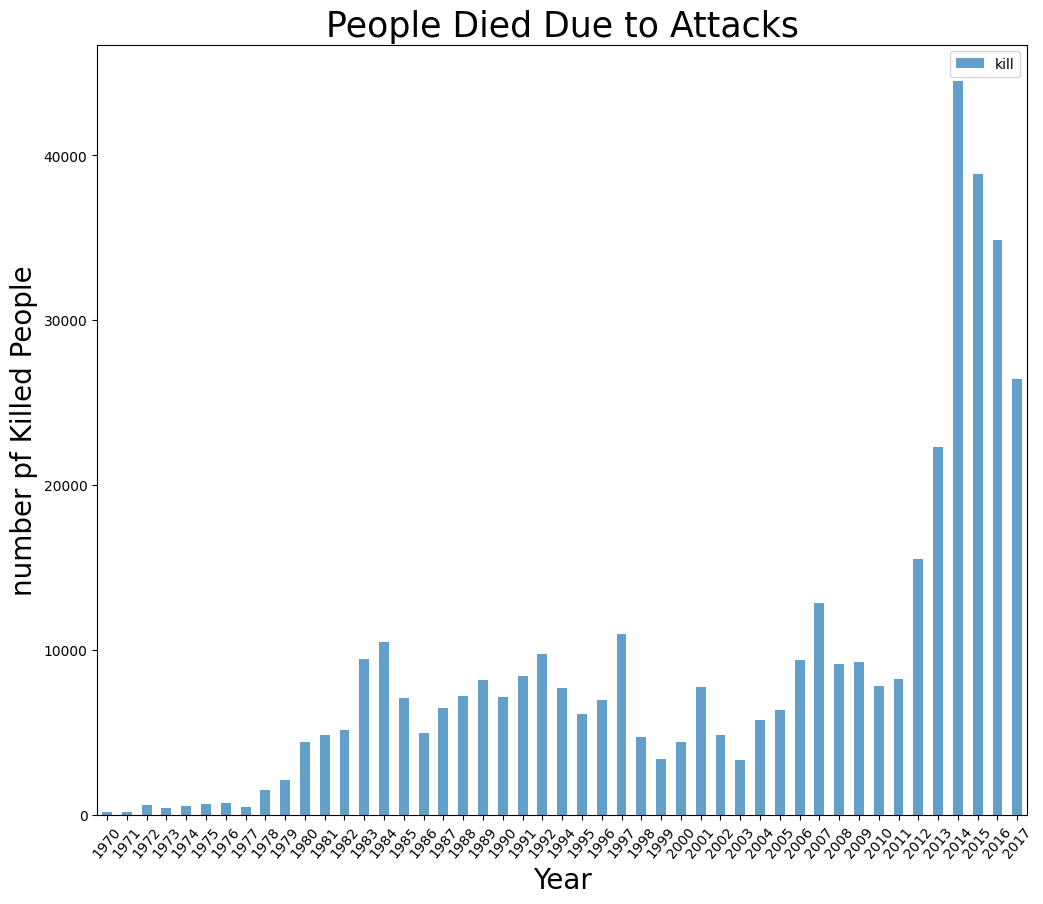

In [17]:
df1 = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(12, 10))
df1.plot(kind = 'bar', alpha = 0.7, ax = ax4)
plt.title("People Died Due to Attacks",fontsize = 25)
plt.xticks(rotation = 50)
plt.xlabel("Year",fontsize = 20)
plt.ylabel('number pf Killed People', fontsize = 20)
plt.show()

Approx. 450000 people died in attack in 2014.

## Visualizing Most Affected City

In [18]:
attack = df.City.value_counts()[:10]
attack

,count
City,
Unknown,9775
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558


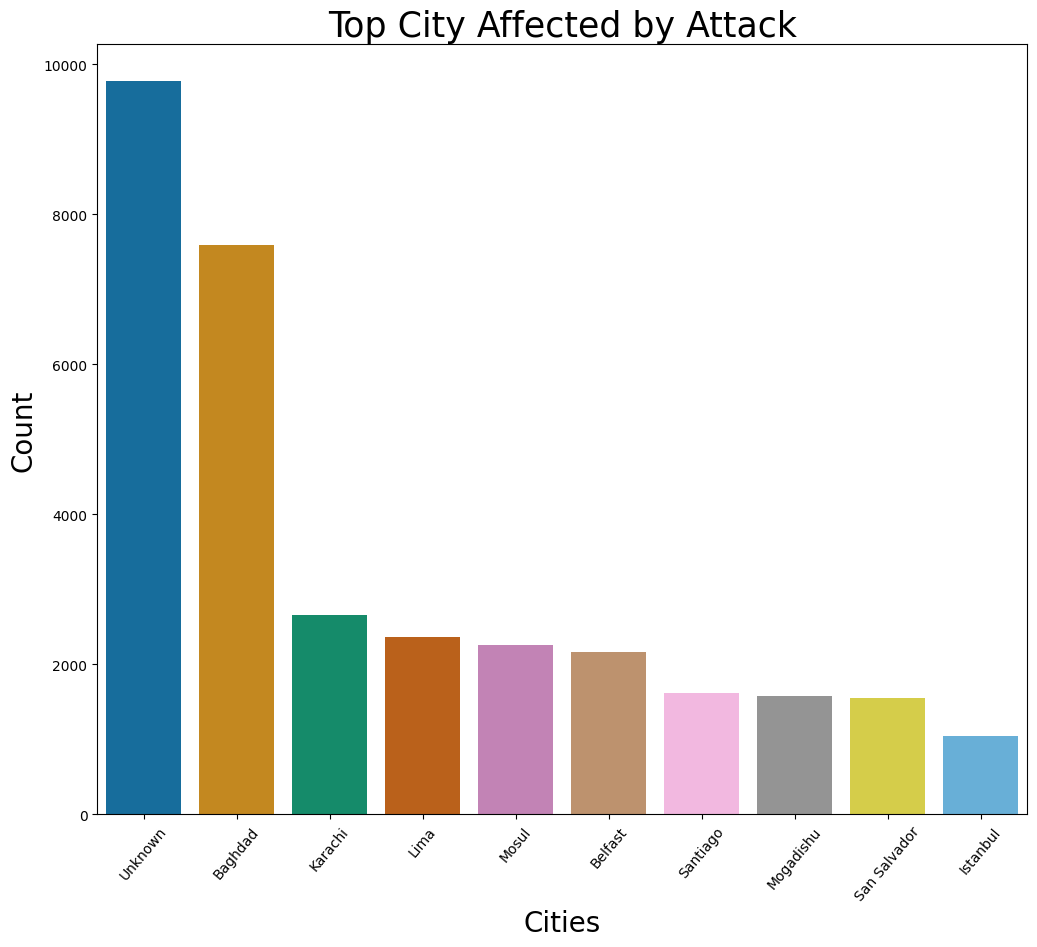

In [19]:
plt.subplots(figsize = (12, 10))
sns.barplot(x =df['City'].value_counts()[:10].index,y =df['City'].value_counts()[:10].values,palette = 'colorblind')
plt.title('Top City Affected by Attack',fontsize = 25)
plt.xticks(rotation = 50)
plt.xlabel('Cities',fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

Baghdad is the Second most effected city while the first one is unkown.

## Attacktype Visualisation

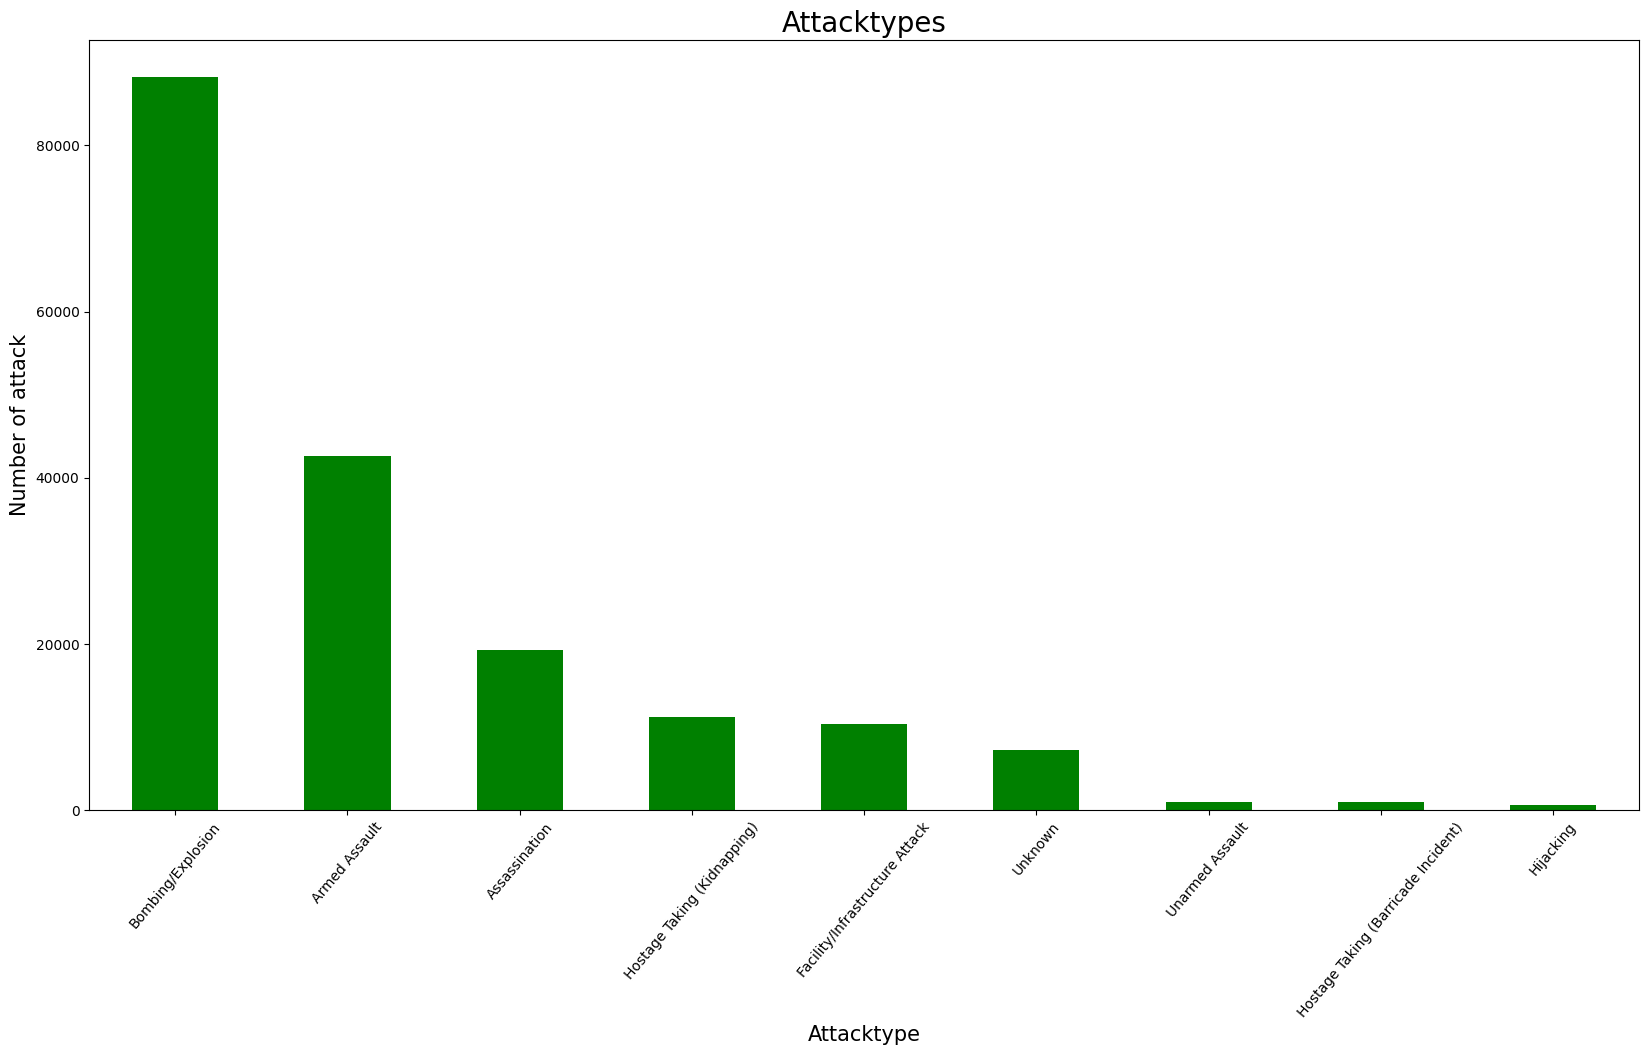

In [20]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 50)
plt.xlabel('Attacktype',fontsize=15)
plt.ylabel('Number of attack',fontsize=15)
plt.title('Attacktypes',fontsize=20)
plt.show()

Bombing and Explosion is the most used attacktypes.

# Number of People Killed due to different attacktypes.

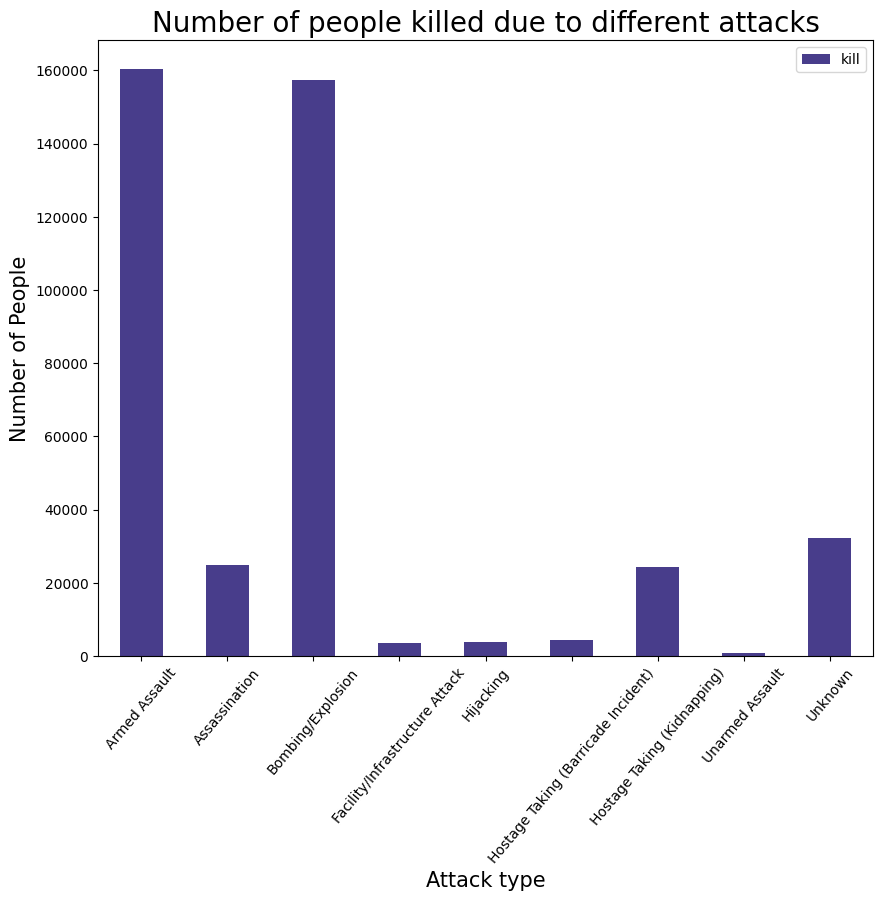

In [21]:
df[['Attacktype', 'kill']].groupby(['Attacktype'],axis = 0).sum().plot(kind = 'bar', figsize = (10,8),color = ['darkslateblue'])
plt.xticks(rotation = 50)
plt.title('Number of people killed due to different attacks', fontsize =  20)
plt.xlabel('Attack type', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.show()

The maximum numbers of people killed by Armed Assuault followed by Bombs\Explosion.

#Number of People Wounded corresponding to the different attacktypes.

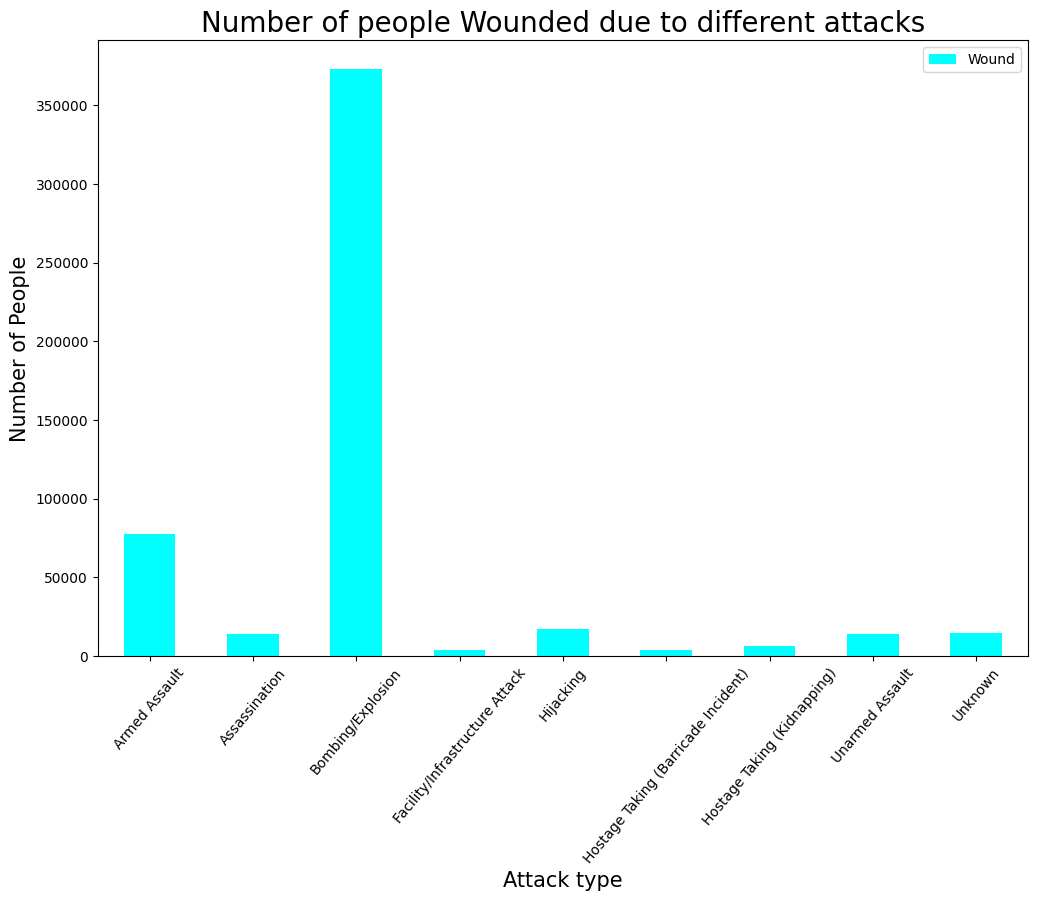

In [22]:
df[['Attacktype', 'Wound']].groupby(['Attacktype'],axis = 0).sum().plot(kind = 'bar', figsize = (12,8),color = ['cyan'])
plt.xticks(rotation = 50)
plt.title('Number of people Wounded due to different attacks', fontsize =  20)
plt.xlabel('Attack type', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.show()

The maximum numbers of people Wounded by Bombs\Explosion.

# Number of Attacks per Year

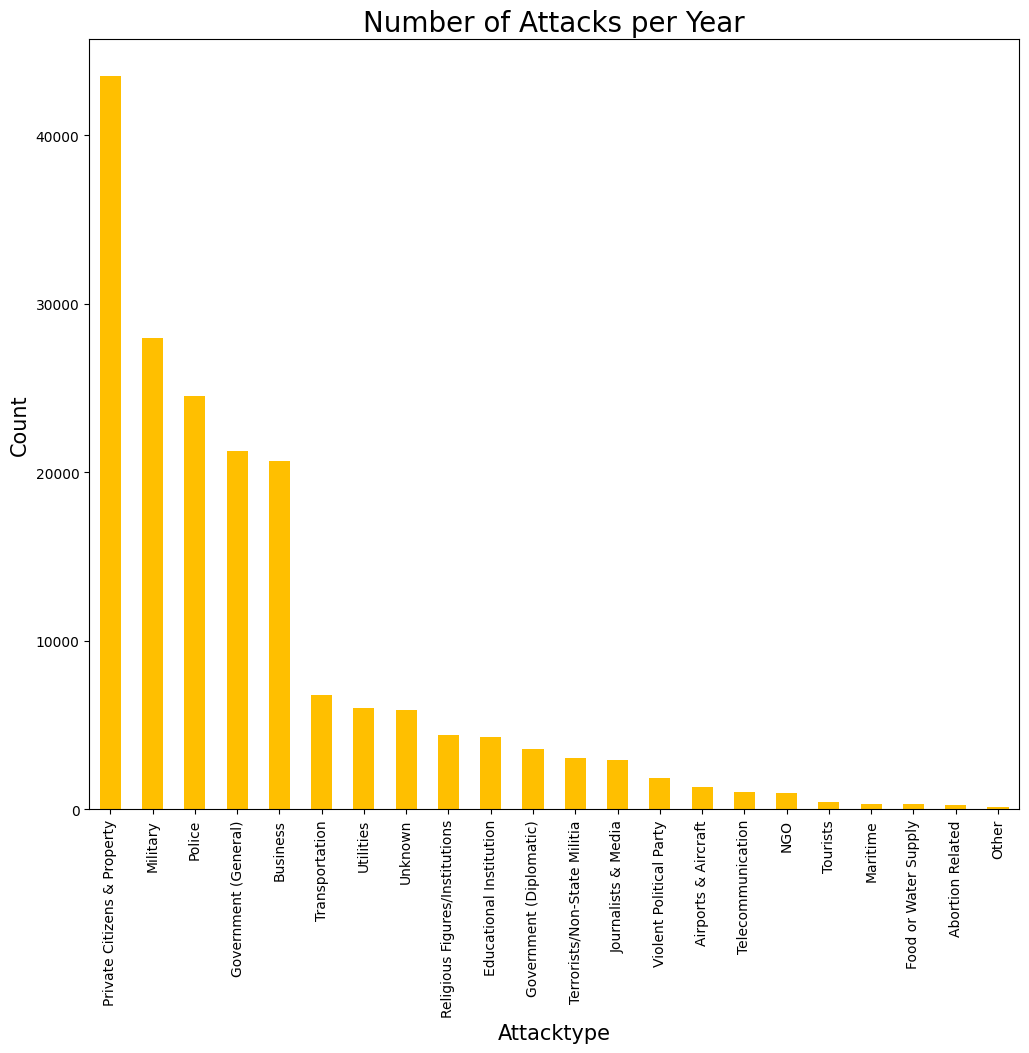

In [23]:
df['Targettype'].value_counts().plot(kind='bar',figsize=(12,10),color="#FFBF00")
plt.xticks(rotation = 90)
plt.xlabel('Attacktype',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Number of Attacks per Year',fontsize=20)
plt.show()

# Top 10 terrorist group attack

In [24]:
df.Group.value_counts()[1:10]

,count
Group,
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


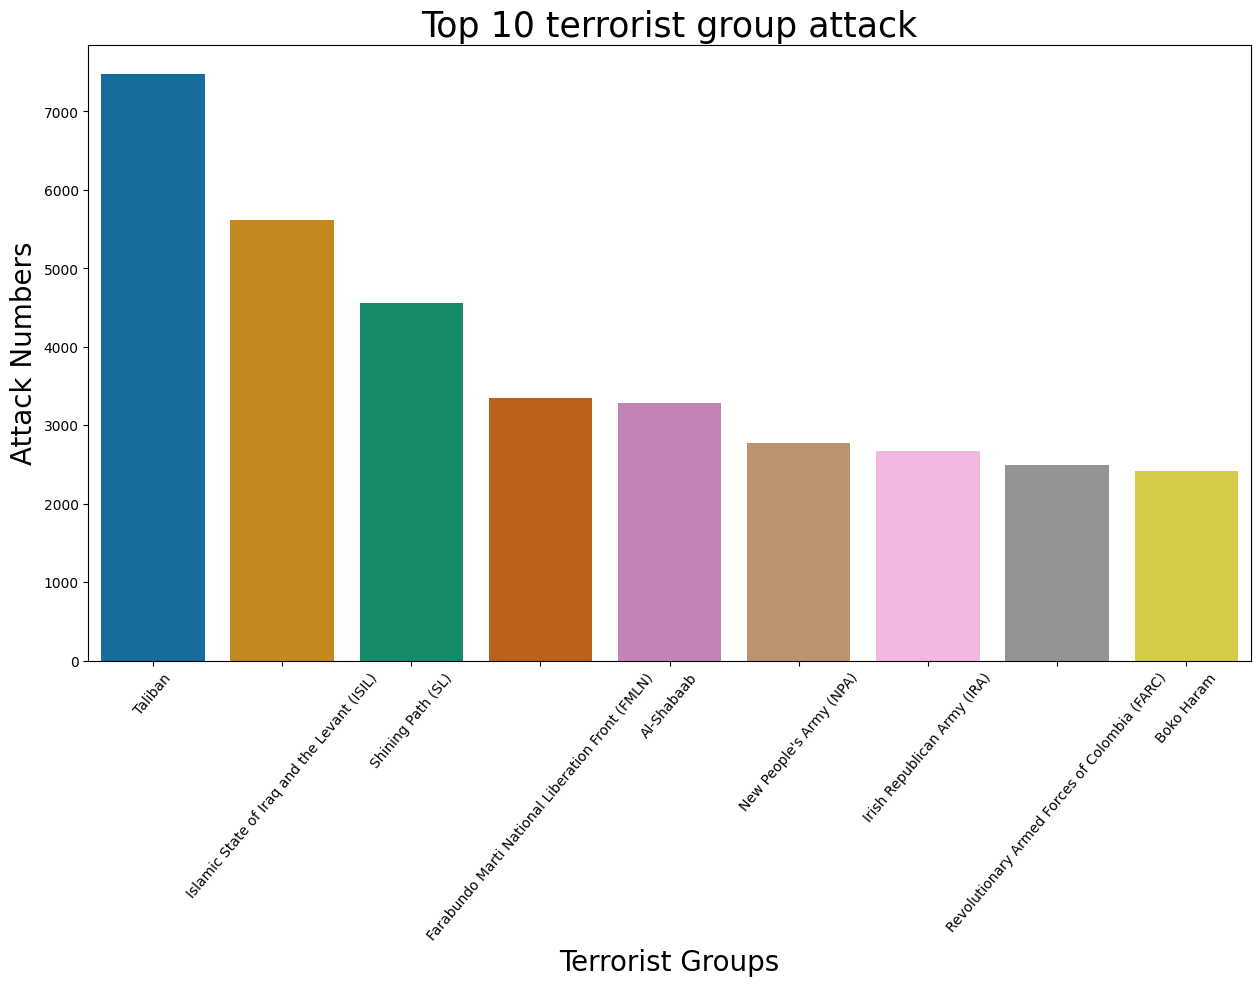

In [25]:
plt.subplots(figsize = (15,8))
sns.barplot(x =df['Group'].value_counts()[1:10].index,y =df['Group'].value_counts()[1:10].values,palette = 'colorblind')
plt.title('Top 10 terrorist group attack',fontsize = 25)
plt.xticks(rotation = 50)
plt.xlabel('Terrorist Groups',fontsize = 20)
plt.ylabel('Attack Numbers', fontsize = 20)
plt.show()

Taliban is responsible for the most of the attacks.

## Numbers of people killed by terrorist groups

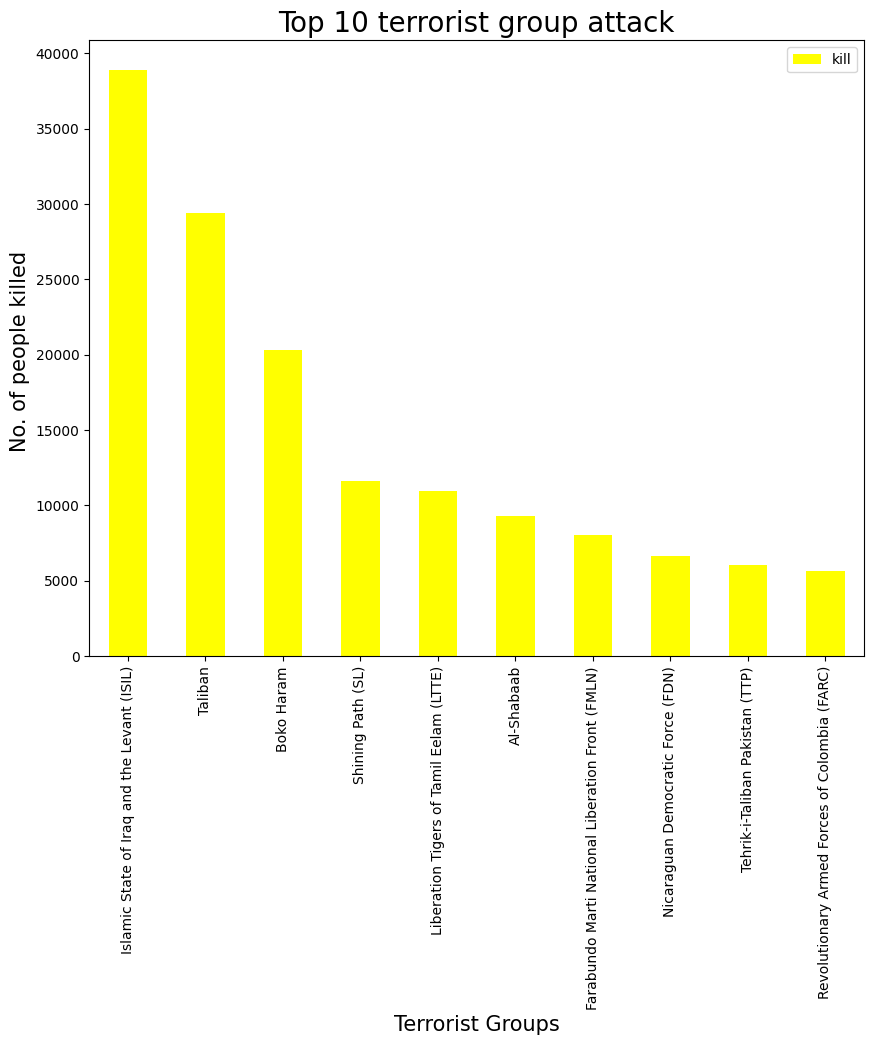

In [26]:
df[['Group', 'kill']].groupby(['Group'],axis = 0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind = 'bar',
                                                                                                          figsize = (10,8),color = ['yellow'])
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.ylabel("No. of people killed ",fontsize=15)
plt.show()

ISIL is responsible for maximum number of people Killing.

In [27]:
# Filter out rows where either 'Group' or 'Country' is 'Unknown'
df2 = df[(df['Group'] != 'Unknown') & (df['Country'] != 'Unknown')]
# Group by 'Group' and 'Country', sum the 'kill' values
data = df2.groupby(['Group', 'Country'], as_index=False)['kill'].sum()
# Sort by 'kill' in descending order and get the top 10
top_10_data = data.sort_values(by='kill', ascending=False).head(10)
# Create the final dataset with only the required columns
final_data = top_10_data[['Group', 'Country', 'kill']]
# Print or display the final dataset
final_data

,Group,Country,kill
2251,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
4666,Taliban,Afghanistan,29269.0
1061,Boko Haram,Nigeria,16917.0
4405,Shining Path (SL),Peru,11595.0
2780,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
271,Al-Shabaab,Somalia,8176.0
1612,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
2261,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
3436,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4701,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


## Counting the Number of People Killed by Terror Attacks.

In [28]:
kill = df.loc[:, 'kill']
print('Number of People Killed by Terror Attack:' , int(sum(kill.dropna())))

Number of People Killed by Terror Attack: 411868


 ## Counting the Number of People Killed by different Attacks Types.

In [29]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


 ## Counting the Number of People Killed in different Countries

In [30]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


**Conclusion and Results :**

Country with the most attacks: **Iraq**

City with the most attacks: **Baghdad**

Region with the most attacks: **Middle East & North Africa**

Year with the most attacks: **2014**

Group with the most attacks: **Taliban**

Most Attack Types: **Bombing/Explosion**